In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import re as re

df = pd.read_csv('app\\data\\star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [2]:
len(df)

100000

In [3]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
df['class'].value_counts()


class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

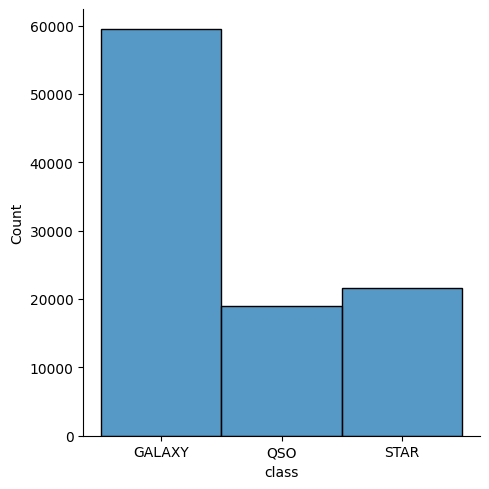

In [7]:
sns.displot(data=df, x='class')

In [10]:
from imblearn.under_sampling import RandomUnderSampler
RndUS = RandomUnderSampler(random_state=17)

X = df.drop('class', axis=1)
y = df['class']
res_X, res_y = RndUS.fit_resample(X, y)

res_df = res_X.copy()
res_df['class'] = res_y

res_df['class'].value_counts()

class
GALAXY    18961
QSO       18961
STAR      18961
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

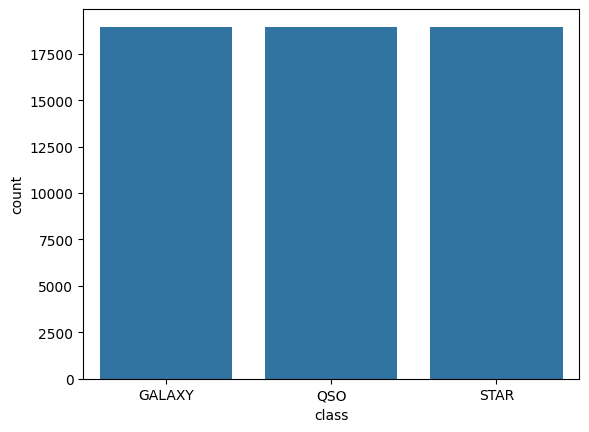

In [19]:
sns.countplot(data=res_df, x='class')

In [18]:
len(res_df)

56883

In [29]:
clipped_res_df = res_df.sample(n=27000, random_state=117)

In [31]:
clipped_res_df.shape

(27000, 18)

In [30]:
clipped_res_df['class'].value_counts()

class
GALAXY    9012
STAR      9000
QSO       8988
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(clipped_res_df, test_size=0.3, random_state=17, stratify=clipped_res_df["class"])

In [33]:
train_df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
96158,1.237661e+18,150.624323,36.065234,19.08491,17.44339,16.82075,16.48649,16.24965,3647,301,1,85,1.796938e+18,0.142543,1596,52998,7,GALAXY
19683,1.237658e+18,134.754517,38.818598,21.23862,21.24504,20.69682,20.72639,20.78638,2830,301,2,174,9.940578e+18,1.214027,8829,57446,27,QSO
45992,1.237666e+18,39.964806,0.400515,19.30808,18.47766,18.18333,18.05095,17.99311,4874,301,4,688,8.260866e+18,0.000445,7337,56662,504,STAR
60538,1.237679e+18,330.710842,4.341082,24.89648,25.69731,22.07515,20.76085,19.84445,7765,301,4,127,1.276339e+19,0.783049,11336,58429,673,GALAXY
58198,1.237650e+18,170.210607,-1.606536,23.05320,21.73975,20.24240,19.42962,18.92756,1140,301,5,115,4.249335e+18,0.458843,3774,55244,687,GALAXY
69043,1.237667e+18,91.986200,63.052399,20.06778,18.51283,17.83619,17.56727,17.45181,5060,301,1,91,2.588502e+18,-0.000315,2299,53711,210,STAR
69843,1.237658e+18,180.359490,59.491905,20.44554,19.48091,19.21701,19.12343,19.05940,2989,301,2,26,1.072992e+18,-0.000887,953,52411,33,STAR
23182,1.237679e+18,354.321093,1.218879,24.63466,21.62017,21.52542,20.62241,21.35367,7717,301,1,291,1.033251e+19,-0.000224,9177,58044,477,STAR
14111,1.237655e+18,166.748405,57.987667,22.47102,21.21662,21.16007,21.20215,20.82470,2243,301,2,273,9.214395e+18,2.784698,8184,57426,108,QSO
33364,1.237668e+18,210.903489,20.371648,24.78182,21.90926,20.26254,19.45341,19.17504,5183,301,3,510,6.609067e+18,0.435111,5870,56065,125,GALAXY


In [34]:
val_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
34664,1.237668e+18,219.403476,14.454430,18.86608,18.75768,18.56838,18.49133,18.54040,5322,301,3,66,3.094027e+18,1.361290,2748,54234,198,QSO
13994,1.237678e+18,32.031331,3.348243,25.07587,21.42346,19.81354,19.02687,18.68685,7675,301,6,82,4.803202e+18,0.437578,4266,55486,409,GALAXY
98015,1.237658e+18,118.134682,25.167627,20.29405,19.70566,19.31153,19.11765,18.87138,2961,301,4,21,5.028477e+18,0.894694,4466,55857,758,QSO
121,1.237663e+18,343.762568,-0.296243,22.65379,22.52258,21.95554,21.85023,21.03508,4192,301,3,247,1.030439e+19,1.166883,9152,58041,564,QSO
98071,1.237680e+18,23.755401,27.119715,26.24436,20.80902,18.97328,18.28931,17.79539,8056,301,6,89,7.052689e+18,0.347494,6264,56223,190,GALAXY


In [37]:
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)